## Компьютерный практикум №3. Кластерный анализ методом KRAB

<p style="text-indent: 25px;">
    Доброго времени суток, <b>Елена Константиновна</b>!
</p>
<p style="text-indent: 25px;">
    Задания в данной лабораторной следующие:
    <ol>
        <li><i>Реализовать алгоритм и применить его к данным из КП2. Разделение кластеров проводить по длинейшему ребру.</i></li>
        <li><i>Вывести таблицу с шагами обьединения (см. пример).</i></li>
        <li><i>Оценить качество кластеризации по критерию F. Вывести значения всех 4 характеристик.</i></li>
        <li><i>Сделать выводы.</i></li>
    </ol>
</p>
<p style="text-indent: 25px;">
    Прежде чем приступить к заданиям, для начала импортируем необходимые библиотеки.
</p>

### 1. Импортирование библиотек

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import copy

<p style="text-indent: 25px;">
    Затем загрузим наши данные. В данной лабораторной по варианту (№1) я должна использовать данные о диабете, в качестве переменных (характеристик обьектов) будут выступать: гемоглобин, вес и протромбированное время.
</p>

![Варианты](Screenshot_1.png)

### 2. Загрузка данных

In [2]:
init_data = pd.read_excel('Diabet.xlsx')
init_data

,№,Уровень холестерина,Стабілізована глюкоза,Ліпопротеїни,Співвідношення холестерину до ліпопротеїну,Гемоглобін,Вік,Стать,Зріст,Вага,Систолічний тиск,Діастолічний тиск,Талія (дюйм),Стегна (дюйми),Протромбіновий час
0,1000,203.0,82,56.0,3.6,4.310000,46,female,62.0,121.0,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,29,female,64.0,218.0,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,58,female,61.0,256.0,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,67,male,67.0,119.0,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,64,male,68.0,183.0,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,53,male,69.0,173.0,138.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,51,female,63.0,154.0,140.0,100.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,29,female,69.0,167.0,120.0,70.0,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,41,female,63.0,197.0,120.0,78.0,41.0,48.0,255.0


In [3]:
init_data.columns

Index(['№', 'Уровень холестерина', 'Стабілізована глюкоза', 'Ліпопротеїни',
       'Співвідношення холестерину до ліпопротеїну', 'Гемоглобін', 'Вік',
       'Стать', 'Зріст', 'Вага', 'Систолічний тиск', 'Діастолічний тиск',
       'Талія (дюйм)', 'Стегна (дюйми)', 'Протромбіновий час'],
      dtype='object')

In [4]:
init_data = init_data[['Гемоглобін', 'Вага', 'Протромбіновий час']]
init_data

,Гемоглобін,Вага,Протромбіновий час
0,4.310000,121.0,720.0
1,4.440000,218.0,360.0
2,4.640000,256.0,180.0
3,4.630000,119.0,480.0
4,7.720000,183.0,300.0
...,...,...,...
398,16.110001,173.0,210.0
399,4.390000,154.0,180.0
400,13.630000,167.0,20.0
401,4.490000,197.0,255.0


<p style="text-indent: 25px;">
    Из вывода видно, что датафрейм имеет пропущенные значения (помечены как <b>NaN</b>). Посмотрим также на то, в каких диапазонах лежат столбцы. 
</p>

In [5]:
init_data.describe()  # describe - статистическое описание данных

,Гемоглобін,Вага,Протромбіновий час
count,390.000000,402.000000,400.000000
mean,5.589769,177.592040,341.250000
std,2.242595,40.340666,309.540953
min,2.680000,99.000000,5.000000
25%,4.380000,151.000000,90.000000
50%,4.840000,172.500000,240.000000
75%,5.600000,200.000000,517.500000
max,16.110001,325.000000,1560.000000


<p style="text-indent: 25px;">
    Четко видно, что данные столбцы несоизмеримы, соответственно необходимо эти данные нормализовать.
</p>
<p style="text-indent: 25px;">
    Сперва реализуем функцию для замены пропущенных значений (будем заменять средними). 
</p>

In [6]:
# замена пропущенных значений
def replacing(df, col_name):
    mean_val = np.mean(df[col_name])
    for i in range(df.shape[0]):
        if np.isnan(df.iloc[i][col_name]):
            df[col_name][i] = mean_val
    return df

In [95]:
data = init_data.copy()
for col_name in init_data.columns.tolist():
    data = replacing(data, col_name)
data

,Гемоглобін,Вага,Протромбіновий час
0,4.310000,121.0,720.0
1,4.440000,218.0,360.0
2,4.640000,256.0,180.0
3,4.630000,119.0,480.0
4,7.720000,183.0,300.0
...,...,...,...
398,16.110001,173.0,210.0
399,4.390000,154.0,180.0
400,13.630000,167.0,20.0
401,4.490000,197.0,255.0


<p style="text-indent: 25px;">
     Затем реализуем функцию для нормализации данных (будем использовать min-max). 
</p>

In [8]:
# нормализация данных
def normalization(df, col_name):
    df[col_name] = (df[col_name] - np.min(df[col_name])) / (np.max(df[col_name]) - np.min(df[col_name]))
    return df

In [96]:
norm_data = data.copy()
for col_name in init_data.columns.tolist():
    norm_data = normalization(norm_data, col_name)
norm_data

,Гемоглобін,Вага,Протромбіновий час
0,0.121370,0.097345,0.459807
1,0.131050,0.526549,0.228296
2,0.145942,0.694690,0.112540
3,0.145197,0.088496,0.305466
4,0.375279,0.371681,0.189711
...,...,...,...
398,1.000000,0.327434,0.131833
399,0.127327,0.243363,0.112540
400,0.815339,0.300885,0.009646
401,0.134773,0.433628,0.160772


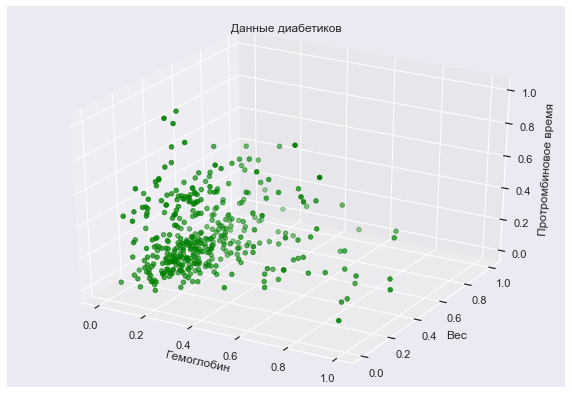

In [10]:
# визуалиция данных
array = norm_data.values
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(array[:, 0], array[:, 1], array[:, 2], color = "green")
plt.title("Данные диабетиков")
ax.set_xlabel('Гемоглобин')  
ax.set_ylabel('Вес')  
ax.set_zlabel('Протромбиновое время') 
plt.show()

<p style="text-indent: 25px;">
     Теперь перейдем непосредственно к заданиям.
</p>

### 3. KRAB

In [214]:
# эвклидова метрика
def euclidean(p1, p2):
    dist = 0
    for i in range(p1.shape[0]):
        dist += (p1[i] - p2[i]) ** 2
    return np.sqrt(dist)


# мера близости обьектов внутри класса
def pi(dists):
    return np.mean(dists)


# соединение точек между собой
def connecting(point, array):
    min_dist = 1000000
    for i in range(array.shape[0]):
        dist = euclidean(point, array[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index


# непосредственно алгоритм
def krab_algorithm(array, init_data, k):
    cols = init_data.columns.tolist() 
    # Шаг 1 - данные
    print('=== Начальные данные ===')
    print(init_data.sort_values(by=cols))
    
    # Шаг 2 - нормализированные данные
    print('=== Нормализированные данные ===')
    print(pd.DataFrame(array, columns=cols).sort_values(by=cols))
    
    # Шаг 3 - построение графа
    points = []  # массив точек
    indices_1 = []  # индексы обьекта 1
    indices_2 = []  # индексы обьекта 2
    rand_index = np.random.randint(low=0, high=init_data.shape[0] - 1)
    indices_1.append(rand_index)
    actual_array = copy.deepcopy(array)
    points.append(actual_array[rand_index])
    actual_array = np.delete(arr=actual_array, obj=rand_index, axis=0)
    dists = []
    while len(points) < init_data.shape[0]:
        index = connecting(points[-1], actual_array)
        index_from_init = np.where(np.all(array == actual_array[index], axis=1))[0][0]
        indices_1.append(index_from_init)
        indices_2.append(index_from_init)
        points.append(actual_array[index])
        dists.append(euclidean(points[-1], points[-2]))
        actual_array = np.delete(arr=actual_array, obj=index, axis=0)
    del indices_1[-1]
    df = pd.DataFrame({'Обьект 1': indices_1, 'Обьект 2': indices_2, 'Расстояние': dists})
    print()
    print('Задано количество кластеров: ', k)
    print('=== Граф ===')
    print(df)
    
    # Шаг 4 - разбиение по самым длинным ребрам
    df = df.reset_index()
    df = df.sort_values(by=['Расстояние'], ascending=False)
    longest_dists_indices = list(df['index'].values)[:k]
    longest_dists_indices.sort()
    true_false = []
    df = df.sort_values(by=['index'])
    df = df.drop(columns=['index'])
    for i in range(df.shape[0]):
        if i in longest_dists_indices:
            true_false.append(True)
        else:
            true_false.append(False)
    df['Ребро одно из самых длинных?'] = true_false
    print('=== Граф с отмеченными самыми длинными ребрами ===')
    print(df)
    
    clusters = []
    clusters_dists = []
    if k > 2:
        for i in range(k):
            if i == 0:
                clusters.append(points[:longest_dists_indices[i] + 1])
                clusters_dists.append(dists[:longest_dists_indices[i]])
            elif i == k - 1:
                clusters.append(points[longest_dists_indices[i] + 1:])
                clusters_dists.append(dists[longest_dists_indices[i] + 1:])
            else:
                clusters.append(points[longest_dists_indices[i - 1] + 1:longest_dists_indices[i] + 1])
                clusters_dists.append(dists[longest_dists_indices[i - 1] + 1:longest_dists_indices[i]])
    else:
        clusters.append(points[:longest_dists_indices[i] + 1])
        clusters.append(points[longest_dists_indices[i] + 1:])
        clusters_dists.append(dists[:longest_dists_indices[i]])
        clusters_dists.append(dists[longest_dists_indices[i] + 1:])
    final_df = []
    clusters_list = []
    for i in range(k):
        for j in range(len(clusters[i])):
            final_df.append(list(clusters[i][j]))
            clusters_list.append(i + 1)
    final_df = pd.DataFrame(final_df, columns=cols)
    final_df['Кластеры'] = clusters_list
    print('=== Данные после разбиения ===')
    print(final_df.sort_values(by=cols))
    
    p = []
    h_value = 1
    for i in range(len(clusters)):
        p.append(np.mean(clusters_dists[i]))
        h_value *= (len(clusters[i]) / array.shape[0])
    print('=== Мера близости обьектов внутри класса ===')
    for i in range(len(p)):
        print('Класс ', i + 1)
        print('Значение: ', p[i])
    p_value = np.mean(p)
    print('=== Общая мера близости ===')
    print(p_value)
    h_value *= k ** k
    d = []
    lamda = []
    for i in longest_dists_indices:
        d.append(dists[i])
        lamda.append(min(dists[i - 1], dists[i + 1]) / dists[i])
    d_value = np.mean(d)
    print('=== Расстояние между классами ===')
    print(d_value)
    lamda_value = np.mean(lamda)
    print('=== Общая мера неоднородности ===')
    print(lamda_value)
    print('=== Равномерность распределения точек ===')
    print(h_value)
    f_value = np.log((d_value * h_value) / (lamda_value * p_value))
    print('=== Общий критерий качества ===')
    print(f_value)

In [215]:
a = [0, 1, 2, 3, 4]
b = [0, 1, 2, 3]
print(a[:2])
print(a[2:])

[0, 1]
[2, 3, 4]


In [212]:
krab_algorithm(array, data, 2)

=== Начальные данные ===
     Гемоглобін   Вага  Протромбіновий час
36     2.680000  159.0               720.0
336    2.730000  142.0               330.0
320    2.850000  115.0                15.0
304    2.850000  143.0                30.0
307    3.030000  151.0               420.0
..          ...    ...                 ...
58    13.700000  189.0               195.0
62    14.310000  235.0               420.0
362   14.940000  123.0                60.0
32    15.520000  191.0               225.0
398   16.110001  173.0               210.0

[403 rows x 3 columns]
=== Нормализированные данные ===
     Гемоглобін      Вага  Протромбіновий час
36     0.000000  0.265487            0.459807
336    0.003723  0.190265            0.209003
320    0.012658  0.070796            0.006431
304    0.012658  0.194690            0.016077
307    0.026061  0.230088            0.266881
..          ...       ...                 ...
58     0.820551  0.398230            0.122186
62     0.865972  0.601770         

In [217]:
krab_algorithm(array, data, 3)

=== Начальные данные ===
     Гемоглобін   Вага  Протромбіновий час
36     2.680000  159.0               720.0
336    2.730000  142.0               330.0
320    2.850000  115.0                15.0
304    2.850000  143.0                30.0
307    3.030000  151.0               420.0
..          ...    ...                 ...
58    13.700000  189.0               195.0
62    14.310000  235.0               420.0
362   14.940000  123.0                60.0
32    15.520000  191.0               225.0
398   16.110001  173.0               210.0

[403 rows x 3 columns]
=== Нормализированные данные ===
     Гемоглобін      Вага  Протромбіновий час
36     0.000000  0.265487            0.459807
336    0.003723  0.190265            0.209003
320    0.012658  0.070796            0.006431
304    0.012658  0.194690            0.016077
307    0.026061  0.230088            0.266881
..          ...       ...                 ...
58     0.820551  0.398230            0.122186
62     0.865972  0.601770         

In [220]:
# я без понятия почему получается отрицательный критерий))))
krab_algorithm(array, data, 4)

=== Начальные данные ===
     Гемоглобін   Вага  Протромбіновий час
36     2.680000  159.0               720.0
336    2.730000  142.0               330.0
320    2.850000  115.0                15.0
304    2.850000  143.0                30.0
307    3.030000  151.0               420.0
..          ...    ...                 ...
58    13.700000  189.0               195.0
62    14.310000  235.0               420.0
362   14.940000  123.0                60.0
32    15.520000  191.0               225.0
398   16.110001  173.0               210.0

[403 rows x 3 columns]
=== Нормализированные данные ===
     Гемоглобін      Вага  Протромбіновий час
36     0.000000  0.265487            0.459807
336    0.003723  0.190265            0.209003
320    0.012658  0.070796            0.006431
304    0.012658  0.194690            0.016077
307    0.026061  0.230088            0.266881
..          ...       ...                 ...
58     0.820551  0.398230            0.122186
62     0.865972  0.601770         

### Выводы

<p style="text-indent: 25px;">
    В результате выполненной работы были получены алгоритм выполнения кластеризации методом KRAB, а также испытания этого алгоритма в деле. Трудно сказать насколько этот алгоритм лучше предыдущего (k-means), несмотря на то, что в теории метод должен работать лучше, на практике из-за его сложной реализации получаются довольно неоднозначные результаты (хотя не исключено, что это связанно с данными).
</p>